In [1]:
import nltk

#### 2. Use the corpus module to explore `austen-persuasion.txt`. How many word tokens does this book have? How many word types?

In [2]:
word_tokens = nltk.corpus.gutenberg.words("austen-persuasion.txt")
print(f"There are {len(word_tokens)} word tokens.")
print(f"There are {len(set(word_tokens))} word types.")

There are 98171 word tokens.
There are 6132 word types.


#### 3. Use the Brown corpus reader `nltk.corpus.brown.words()` or the Web text corpus reader `nltk.corpus.webtext.words()` to access some sample text in two different genres.

In [3]:
from nltk.corpus import brown

In [4]:
", ".join(brown.categories())

'adventure, belles_lettres, editorial, fiction, government, hobbies, humor, learned, lore, mystery, news, religion, reviews, romance, science_fiction'

In [5]:
brown.words(categories="lore")

['In', 'American', 'romance', ',', 'almost', 'nothing', ...]

In [6]:
brown.words(categories="science_fiction")

['Now', 'that', 'he', 'knew', 'himself', 'to', 'be', ...]

#### 4. Read in the texts of the *State of the Union* addresses, using the `state_union` corpus reader. Count occurrences of `men`, `women`, and `people` in each document. What has happened to the usage of these words over time?

In [7]:
from nltk.corpus import state_union

The first four charachters of each `fileid` are the year, which can be parsed too see the progression over time.

In [8]:
", ".join(state_union.fileids())

'1945-Truman.txt, 1946-Truman.txt, 1947-Truman.txt, 1948-Truman.txt, 1949-Truman.txt, 1950-Truman.txt, 1951-Truman.txt, 1953-Eisenhower.txt, 1954-Eisenhower.txt, 1955-Eisenhower.txt, 1956-Eisenhower.txt, 1957-Eisenhower.txt, 1958-Eisenhower.txt, 1959-Eisenhower.txt, 1960-Eisenhower.txt, 1961-Kennedy.txt, 1962-Kennedy.txt, 1963-Johnson.txt, 1963-Kennedy.txt, 1964-Johnson.txt, 1965-Johnson-1.txt, 1965-Johnson-2.txt, 1966-Johnson.txt, 1967-Johnson.txt, 1968-Johnson.txt, 1969-Johnson.txt, 1970-Nixon.txt, 1971-Nixon.txt, 1972-Nixon.txt, 1973-Nixon.txt, 1974-Nixon.txt, 1975-Ford.txt, 1976-Ford.txt, 1977-Ford.txt, 1978-Carter.txt, 1979-Carter.txt, 1980-Carter.txt, 1981-Reagan.txt, 1982-Reagan.txt, 1983-Reagan.txt, 1984-Reagan.txt, 1985-Reagan.txt, 1986-Reagan.txt, 1987-Reagan.txt, 1988-Reagan.txt, 1989-Bush.txt, 1990-Bush.txt, 1991-Bush-1.txt, 1991-Bush-2.txt, 1992-Bush.txt, 1993-Clinton.txt, 1994-Clinton.txt, 1995-Clinton.txt, 1996-Clinton.txt, 1997-Clinton.txt, 1998-Clinton.txt, 1999-Clinto

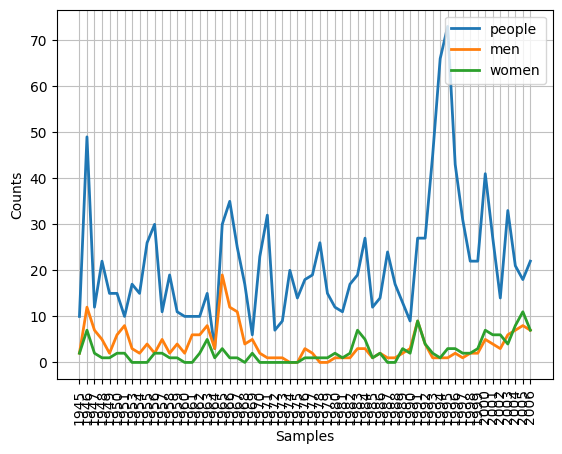

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [9]:
cfd = nltk.ConditionalFreqDist(
            (target, fileid[:4])
            for fileid in state_union.fileids()
            for w in state_union.words(fileid)
            for target in ["men", "women", "people"]
            if w.lower() == target)
cfd.plot()

#### 5. Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: `member_meronyms()`, `part_meronyms()`, `substance_meronyms()`, `member_holonyms()`, `part_holonyms()`, and `substance_holonyms()`.

In [10]:
from nltk.corpus import wordnet as wn

In [11]:
wn.synsets("tree")

[Synset('tree.n.01'),
 Synset('tree.n.02'),
 Synset('tree.n.03'),
 Synset('corner.v.02'),
 Synset('tree.v.02'),
 Synset('tree.v.03'),
 Synset('tree.v.04')]

In [12]:
tree = wn.synset("tree.n.01")

In [13]:
tree.definition()

'a tall perennial woody plant having a main trunk and branches forming a distinct elevated crown; includes both gymnosperms and angiosperms'

In [14]:
tree.member_meronyms()

[]

In [15]:
tree.part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [16]:
tree.substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [17]:
tree.member_holonyms()

[Synset('forest.n.01')]

In [18]:
tree.part_holonyms()

[]

In [19]:
tree.substance_holonyms()

[]

#### 6. In the discussion of comparative wordlists, we created an object called `translate` which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?

There can be multiple meanings for the same word, which could be translated differently from one language to the other. An improved translator should be able to recognize the meaning of the word and use that for a lookup-table.

#### 7. According to Strunk and White's *Elements of Style*, the word *however*, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: *However you advise him, he will probably do as he thinks best*. (http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the *LanguageLog* posting "Fossilized prejudices about 'however'" at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html

In [20]:
from nltk.corpus import brown

In [21]:
for cat in brown.categories():
    print("")
    print(f"Use of 'however' in Brown's corpus, category '{cat}'.")
    print(f"==================================================")
    print(nltk.Text(brown.words(categories=cat)).concordance("however"))


Use of 'however' in Brown's corpus, category 'adventure'.
Displaying 7 of 7 matches:
elt strongly attached to the hall , however , and hardly a day passed when I di
to be wearing . I did not despair , however ; ; far from it ! ! I was constantl
Along with this self-satisfaction , however , Joyce sensed a growing tension . 
test tangle . Over and above that , however , was his growing suspicion of Chuc
ything but swarms of bees in them . However , when there's a job to be done , I
ather invincible . It wasn't that , however , which decided them not to go to A
e long legs were less than poetic , however . Zingggg-O ! ! Then the boy straig
None

Use of 'however' in Brown's corpus, category 'belles_lettres'.
Displaying 25 of 98 matches:
y support ? ? I am concerned here , however , with the Northern liberal's attit
us changes in world politics have , however , thrown it into confusion , so muc
s strictly national in motivation , however much other nations ( e.g. , the Uni
til well into th

#### 8. Define a conditional frequency distribution over the Names corpus that allows you to see which _initial_ letters are more frequent for males vs. females (cf. [4.4](https://www.nltk.org/book/ch02.html#fig-cfd-gender)).

In [22]:
from nltk.corpus import names
import string

In [23]:
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [24]:
names.fileids()

['female.txt', 'male.txt']

In [25]:
cfd = nltk.ConditionalFreqDist(
    (letter, gender)
    for gender in ["female", "male"]
    for name in names.words(f"{gender}.txt")
    for letter in string.ascii_uppercase
    if name.startswith(letter)
)

In [26]:
cfd.tabulate(conditions=string.ascii_uppercase, samples=["female", "male"])

  female   male 
A    443    213 
B    246    173 
C    469    166 
D    308    146 
E    251    119 
F    144     87 
G    213    156 
H    124    163 
I     83     45 
J    293    144 
K    276     70 
L    332    113 
M    484    200 
N    158     77 
O     66     52 
P    121    101 
Q      9     15 
R    247    200 
S    309    238 
T    198    188 
U     14     22 
V    105     50 
W     54    151 
X      5      7 
Y     18     16 
Z     31     31 


#### 9. Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as *monstrous* in _Moby Dick_ and in _Sense and Sensibility_?

... 

#### 10. Read the BBC News article: _UK's Vicky Pollards 'left behind'_ http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on _LanguageLog_, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

In [27]:
from nltk.corpus import gutenberg

In [28]:
for fileid in gutenberg.fileids():
    corpus = gutenberg.words(fileid)
    top_words_freq = 0.0
    num_top_words = 1
    while top_words_freq < 1/3:
        # Recalculating the frequency ditribution each time is inefficent, there must be a smarter solution.
        top_words = nltk.FreqDist(corpus).most_common(num_top_words)
        occurences_top_words = sum(count for _, count in top_words)
        top_words_freq = occurences_top_words / len(corpus)
        num_top_words += 1
    print(f"In '{fileid}', {num_top_words} words account for {top_words_freq:.3} of the total.")

In 'austen-emma.txt', 19 words account for 0.334 of the total.
In 'austen-persuasion.txt', 18 words account for 0.338 of the total.
In 'austen-sense.txt', 19 words account for 0.34 of the total.
In 'bible-kjv.txt', 12 words account for 0.334 of the total.
In 'blake-poems.txt', 20 words account for 0.335 of the total.
In 'bryant-stories.txt', 17 words account for 0.341 of the total.
In 'burgess-busterbrown.txt', 17 words account for 0.334 of the total.
In 'carroll-alice.txt', 15 words account for 0.337 of the total.
In 'chesterton-ball.txt', 19 words account for 0.338 of the total.
In 'chesterton-brown.txt', 18 words account for 0.337 of the total.
In 'chesterton-thursday.txt', 18 words account for 0.34 of the total.
In 'edgeworth-parents.txt', 17 words account for 0.336 of the total.
In 'melville-moby_dick.txt', 18 words account for 0.335 of the total.
In 'milton-paradise.txt', 24 words account for 0.336 of the total.
In 'shakespeare-caesar.txt', 19 words account for 0.338 of the total

The claim in the BBC article is shared by several british classics.

#### 11. Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

In [29]:
from nltk.corpus import brown

In [30]:
cfd = nltk.ConditionalFreqDist(
            (genre, word)
            for genre in brown.categories()
            for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


- The genres *news* and *hobbies* use the future conditional *will* more often than other gnres.
- The genre *hobbies* uses *can* and *may* significantly more often than other gnres.
- The genre *romance* uses *could* significantly more often than other gnres.

In [31]:
auxilary = ["is", "has"]
cfd.tabulate(conditions=genres, samples=auxilary)

                 is has 
           news 732 300 
       religion 533 111 
        hobbies 959 231 
science_fiction  47   9 
        romance 150  26 
          humor 117  26 


In [32]:
words = ["man", "woman", "person", "men", "women", "people"]
cfd.tabulate(conditions=genres, samples=words)

                   man  woman person    men  women people 
           news     72      6      9     47     16     52 
       religion     64      3      6     39      6     34 
        hobbies     16      1      6     33      2     49 
science_fiction     17      4      1      5      3     20 
        romance     87     34      9     29     22     48 
          humor     21     10      7      6      4     19 


#### 12. The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

In [33]:
from nltk.corpus import cmudict

In [34]:
pron_count = {}
for word, _ in cmudict.entries():
    if word not in pron_count:
        pron_count[word] = 1
    else:
        pron_count[word] += 1
multip_pron = len([count for count in pron_count.values() if count > 1])
fraction = multip_pron / len(pron_count)
print(f"The fraction of words with multiple pronciations is {fraction:.2}.")

The fraction of words with multiple pronciations is 0.075.


#### 13. What percentage of noun synsets have no hyponyms? You can get all noun synsets using `wn.all_synsets('n')`.

In [35]:
from nltk.corpus import wordnet as wn

In [36]:
num_synsets = 0
num_no_hyponyms = 0
for s in wn.all_synsets("n"):
    if len(s.hyponyms()) == 0:
        num_no_hyponyms += 1
    num_synsets += 1

In [37]:
frac = num_no_hyponyms / num_synsets
f"{frac:.0%} of noun synsets have no hyponym."

'80% of noun synsets have no hyponym.'

In [38]:
num_synsets

82115

#### 14. Define a function `supergloss(s)` that takes a synset s as its argument and returns a string consisting of the concatenation of the definition of `s`, and the definitions of all the hypernyms and hyponyms of `s`.

In [39]:
def supergloss(s):
    return "\n".join(
        [s.definition()]
        + [h.definition() for h in s.hypernyms()]
        + [h.definition() for h in s.hyponyms()]
    )

In [40]:
print(supergloss(wn.synset("car.n.01")))

a motor vehicle with four wheels; usually propelled by an internal combustion engine
a self-propelled wheeled vehicle that does not run on rails
a vehicle that takes people to and from hospitals
a car that has a long body and rear door with space behind rear seat
a car that is old and unreliable
a car driven by a person whose job is to take passengers where they want to go in exchange for money
a small and economical car
a car that has top that can be folded or removed
a car with two doors and front seats and a luggage compartment
a car in which policemen cruise the streets; equipped with radiotelephonic communications to headquarters
a car that is powered by electricity
a car with relatively low fuel efficiency
a car that resembles a convertible but has a fixed rigid top
a car having a hatchback door
an early term for an automobile
a car modified to increase its speed and acceleration
a car suitable for traveling over rough terrain
large luxurious car; usually driven by a chauffeur
a 

In [41]:
print(supergloss(wn.synset("boat.n.01")))

a small vessel for travel on water
a craft designed for water transportation
a boat built by Noah to save his family and animals from the flood
a flatbottom boat for carrying heavy loads (especially on canals)
a small boat that ferries supplies and commodities for sale to a larger ship at anchor
a long boat that carries freight and is narrow enough to be used in canals
a boat that transports people or vehicles across a body of water and operates on a regular schedule
a boat equipped to fight fires on ships or along a waterfront
long narrow flat-bottomed boat propelled by sculling; traditionally used on canals of Venice
a boat that is on guard duty (as in a harbor) around a fleet of warships
a small shallow-draft boat carrying mounted guns; used by costal patrols
any of various Chinese boats with a high poop and lugsails
the largest boat carried by a merchant sailing vessel
small fishing boat rigged with one or more lugsails
a flat-bottomed boat used on upper Great Lakes
a boat for carr

#### 15. Write a program to find all words that occur at least three times in the Brown Corpus.

In [42]:
from nltk.corpus import brown

In [43]:
fdist = nltk.FreqDist(brown.words())

In [44]:
at_least_3 = set([w for w, n in fdist.items() if n >= 3])

In [45]:
# Uncomment to show list of words
# ",".join(sorted(at_least_3))

#### 16. Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in [1.1](https://www.nltk.org/book/ch01.html#tab-brown-types). Include the full set of Brown Corpus genres (`nltk.corpus.brown.categories()`). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

In [46]:
from nltk.corpus import brown
from tabulate import tabulate

In [47]:
def lexical_scores(tokens):
    return [f"{len(set(tokens))}", f"{len(tokens)}", f"{len(set(tokens)) / len(tokens):.3}"]

rows = [[c] + lexical_scores(brown.words(categories=c)) for c in brown.categories()]

In [48]:
print(tabulate(rows, ["Genre", "Tokens", "Types", "Lexical diversity"]))

Genre              Tokens    Types    Lexical diversity
---------------  --------  -------  -------------------
adventure            8874    69342               0.128
belles_lettres      18421   173096               0.106
editorial            9890    61604               0.161
fiction              9302    68488               0.136
government           8181    70117               0.117
hobbies             11935    82345               0.145
humor                5017    21695               0.231
learned             16859   181888               0.0927
lore                14503   110299               0.131
mystery              6982    57169               0.122
news                14394   100554               0.143
religion             6373    39399               0.162
reviews              8626    40704               0.212
romance              8452    70022               0.121
science_fiction      3233    14470               0.223


The gnere "learned", corresponding to *Mosteller: Probability with Statistical Applications* has the lowest diversity. This is not rusprising, as it is a math book.

#### 17. Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [49]:
import nltk
from nltk.corpus import stopwords

In [50]:
def common_non_stop(text):
    text = list(text).copy()
    for stopword in stopwords.words("english"):
        if stopword in text:
            text.remove(stopword)
    return [w for w, _ in nltk.FreqDist(text).most_common(50)]

In [51]:
from nltk.corpus import gutenberg
test_text = gutenberg.words("austen-emma.txt")
", ".join(common_non_stop(test_text))

',, ., to, the, and, of, I, a, was, her, ;, it, in, not, ", be, she, that, you, had, as, --, he, for, have, is, with, Mr, very, but, .", his, \', at, s, so, Emma, all, could, would, been, him, Mrs, .--, on, any, my, no, Miss, were'

#### 18. Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [52]:
import nltk
from nltk.corpus import stopwords

In [53]:
def common_nonstop_bigrams(text):
    bigrams = list(nltk.bigrams(text))
    for s in stopwords.words("english"):
        for b in bigrams:
            if s in b:
                bigrams.remove(b)
    fd = nltk.FreqDist(bigrams)
    return fd.most_common(50)

In [54]:
from nltk.book import text6
test_text = text6
common_nonstop_bigrams(test_text)

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


[(('ARTHUR', ':'), 217),
 ((']', '['), 94),
 (('!', '['), 82),
 ((':', 'Oh'), 82),
 (('Oh', ','), 79),
 (('LAUNCELOT', ':'), 76),
 (('1', ':'), 75),
 (('#', '1'), 75),
 (('.', 'ARTHUR'), 75),
 (('GALAHAD', ':'), 69),
 ((':', '['), 67),
 ((':', 'I'), 65),
 (('!', 'ARTHUR'), 63),
 (('FATHER', ':'), 63),
 (('BEDEVERE', ':'), 61),
 (('KNIGHT', ':'), 59),
 ((',', 'I'), 58),
 ((':', 'No'), 56),
 ((':', 'What'), 55),
 ((':', 'Well'), 52),
 (('I', "'"), 51),
 (('Well', ','), 50),
 (('VILLAGER', '#'), 47),
 (('#', '2'), 41),
 (('2', ':'), 40),
 (('ROBIN', ':'), 39),
 (('.', 'I'), 38),
 ((':', 'Yes'), 38),
 (('No', ','), 38),
 (('.', '['), 38),
 (('Ni', '!'), 36),
 (('boom', ']'), 35),
 (('?', 'ARTHUR'), 34),
 (('[', 'boom'), 34),
 (('BLACK', 'KNIGHT'), 32),
 (('GUARD', '#'), 32),
 (('witch', '!'), 31),
 ((':', 'You'), 30),
 (('it', '!'), 30),
 (('[', 'singing'), 29),
 (('HEAD', 'KNIGHT'), 29),
 (('TIM', ':'), 28),
 ((':', 'And'), 27),
 (('.', 'GALAHAD'), 27),
 (('.', 'LAUNCELOT'), 27),
 (('clop

#### 19. Write a program to create a table of word frequencies by genre, like the one given in [1](https://www.nltk.org/book/ch02.html#sec-extracting-text-from-corpora) for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings. 

In [55]:
import nltk
from nltk.corpus import brown

In [56]:
def freq_by_genre(samples):
    genres = brown.categories()
    cfd = nltk.ConditionalFreqDist(
        (genre, word)
        for genre in genres
        for word in brown.words(categories=genre))
    return cfd.tabulate(conditions=genres, samples=samples)

In [57]:
freq_by_genre(["heart", "spaceship", "hammer", "ghost"])

                    heart spaceship    hammer     ghost 
      adventure        11         0         1         1 
 belles_lettres        22         0         0         2 
      editorial        12         0         0         1 
        fiction        15         0         0         0 
     government         2         0         0         0 
        hobbies        14         0         0         0 
          humor        14         0         2         0 
        learned         7         0         1         1 
           lore        14         0         0         0 
        mystery         5         0         3         1 
           news         5         0         0         0 
       religion        15         0         0         0 
        reviews        15         0         0         0 
        romance        17         0         0         3 
science_fiction         2         2         0         0 


#### 20. Write a function `word_freq()` that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.

In [58]:
import nltk
from nltk.corpus import brown

In [59]:
def word_freq(word, section_id):
    section = brown.words(section_id)
    fd = nltk.FreqDist(section)
    return fd[word]

In [60]:
word_freq("Atlanta", "ca01")

5

#### 21. Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary.

In [61]:
import nltk

In [62]:
def syllables_count(text):
    prondict = nltk.corpus.cmudict.dict()
    num_syllables = 0
    for word in text:
        if word not in prondict:
            # Estimate: if the word is not in the dictionary, add one syllable
            num_syllables += 1
        else:
            # Estimate: there can be multiple pronunciations of the same word and only one is considered
            num_syllables += len(prondict[word.lower()])
    return num_syllables

In [63]:
from nltk.corpus import genesis
test_text = genesis.words('english-kjv.txt')
syllables_count(test_text)

64859

#### 22. Define a function `hedge(text)` which processes a text and produces a new version with the word `'like'` between every third word.

In [64]:
def hedge(text):
    text = list(text).copy()
    hedged_text = []
    while len(text) > 3:
        hedged_text += text[:2] + ["like"] + [text[2]] + ["like"]
        text = text[3:]
    hedged_text += text
    return hedged_text

In [65]:
from nltk.corpus import genesis
test_text = genesis.words('english-kjv.txt')
" ".join(hedge(test_text)[:100])

'In the like beginning like God created like the like heaven and like the like earth . like And like the earth like was like without form like , like and void like ; like and darkness like was like upon the like face like of the like deep like . And like the like Spirit of like God like moved upon like the like face of like the like waters . like And like God said like , like Let there like be like light : like and like there was like light like . And like God like'

#### 23. **Zipf's Law**: Let _f(w)_ be the frequency of a word _w_ in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. _f_ × _r = k_, for some constant _k_). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.

- a.  Write a function to process a large text and plot word frequency against word rank using `pylab.plot`. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?
- b.  Generate random text, e.g., using `random.choice("abcdefg ")`, taking care to include the space character. You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?

The use of `pylab` [is discouraged](https://matplotlib.org/stable/api/index.html#module-pylab), I am using `matplotlib.pyplot` instead.

In [66]:
import matplotlib.pyplot as plt
import nltk

In [67]:
def zipfs_law(text):
    
    num_words = 100 # arbitrary limit of number of words to show
    fd = nltk.FreqDist(text).most_common(num_words)
    
    plt.figure(figsize=(12, 6))
    
    x = [w for w, _ in fd]
    y = [n for _, n in fd]
    plt.bar(x, y)
    
    max_count = y[0]
    y_reference = [max_count / k for k in range(1, num_words+1)]
    plt.plot(y_reference, color="red")
    
    plt.xticks(rotation=90)
    ax = plt.gca()
    ax.set_yscale("log")

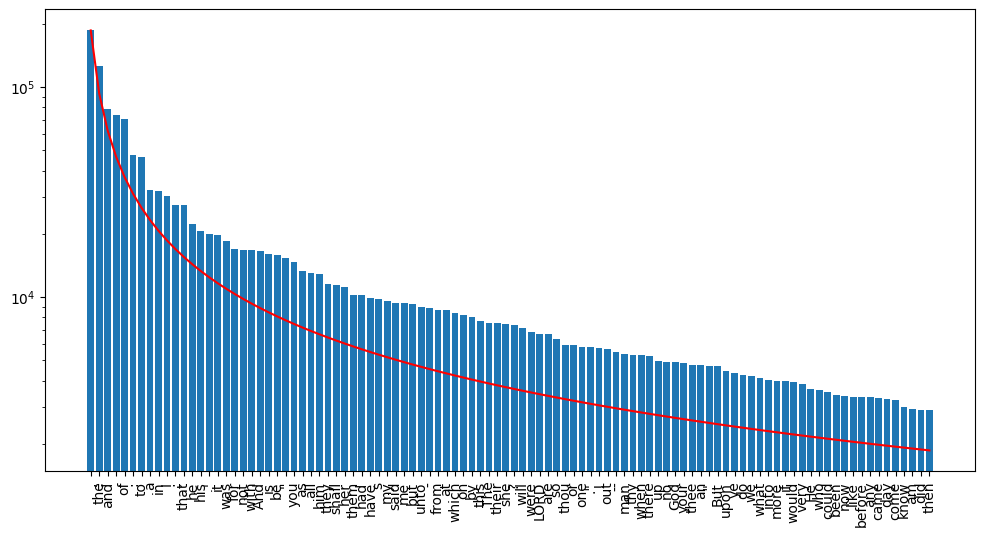

In [68]:
from nltk.corpus import gutenberg
test_text = gutenberg.words()
zipfs_law(test_text)

At the extreme ends, Zipf's law pattern is less visible.

In [69]:
import random
import string

In [70]:
random_text = random.choices(string.ascii_letters + " ", k=100000)
random_text = "".join(random_text)
random_text = random_text.split(" ")

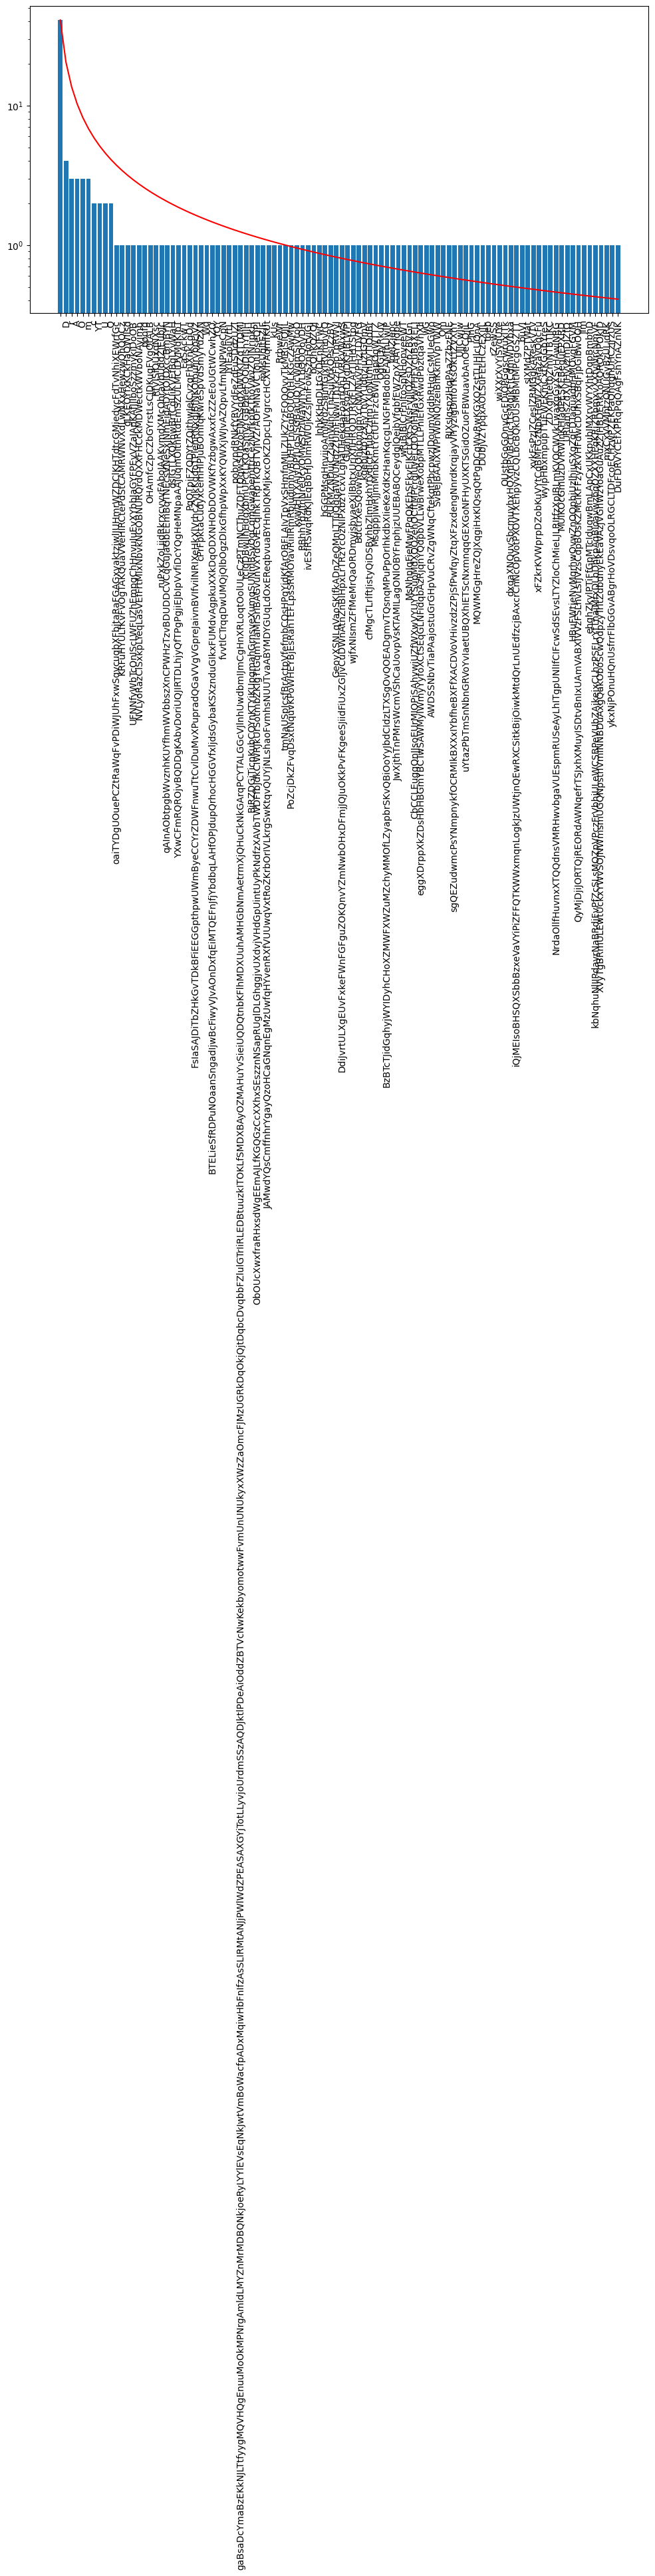

In [71]:
zipfs_law(random_text)

Zipf's law does not apply to random text.

#### 24. Modify the text generation program in [2.2](https://www.nltk.org/book/ch02.html#code-random-text) further, to do the following tasks:
- a.  Store the _n_ most likely words in a list words then randomly choose a word from the list using random.choice(). (You will need to import random first.)
- b.  Select a particular genre, such as a section of the Brown Corpus, or a genesis translation, one of the Gutenberg texts, or one of the Web texts. Train the model on this corpus and get it to generate random text. You may have to experiment with different start words. How intelligible is the text? Discuss the strengths and weaknesses of this method of generating random text.
- c.  Now train your system using two distinct genres and experiment with generating text in the hybrid genre. Discuss your observations.

In [72]:
import random
import nltk

In [73]:
def generate_model(cfdist, word, n=3, num=15):
    for i in range(num):
        print(word, end=' ')
        next_words = cfd[word].most_common(n)
        word = random.choice(next_words)[0]

In [74]:
text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

generate_model(cfd, 'living')

living substance . Then Joseph , I have I pray for a son . And 

In [75]:
from nltk.corpus import brown

text = brown.words("cc17") # Time Magazine: Reviews
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

generate_model(cfd, "public", num=30)

public -- the blood and the blood and the blood cholesterol . He is a day , the heart attacks , and the fat molecule , which less than half 

Compared to the original algorithm, this approach has the advantage of not getting stuck in loops. It still produces mostly nonsensical text.

In [76]:
text = brown.words(categories=["science_fiction", "religion"])
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)

generate_model(cfd, "spaceship", num=200)

spaceship '' , and to the same effect , and to be the world , the same time . The same effect , and , but the other numbers , but it is not be a man is the other . The Lord Jesus Christ as the world of God '' . It is the world of a new members to be born again , but it . The new birth to be born of a new member of a new member . The Lord is not be the world of the same thing '' . `` You must have a man , but the world . It is not have to a man , the same effect is the world , the world of the same thing , but it is the world . `` I have to be born again , and , but the other hand -- the world . It was not be the world of a man is a `` I am not have to be the other hand and to the world of a new members to the world . The new members to the world , but also the same time and to 

#### 25. Define a function `find_language()` that takes a string as its argument, and returns a list of languages that have that string as a word. Use the `udhr` corpus and limit your searches to files in the Latin-1 encoding.

In [77]:
from nltk.corpus import udhr

In [78]:
def find_language(word):
    latin_languages = [l for l in udhr.fileids() if "Latin1" in l]
    langs_with_word = [l for l in latin_languages if word.lower() in [w.lower() for w in udhr.words(l)]]
    return langs_with_word

In [79]:
find_language("human")

['English-Latin1',
 'Interlingua-Latin1',
 'NigerianPidginEnglish-Latin1',
 'SolomonsPidgin_Pijin-Latin1',
 'TokPisin-Latin1',
 'Yao-Latin1']

In [80]:
find_language("mondo")

['Ido-Latin1', 'Italian-Latin1', 'Italian_Italiano-Latin1']

In [81]:
find_language("recht")

['Dutch_Nederlands-Latin1',
 'German_Deutsch-Latin1',
 'Luxembourgish_Letzebuergeusch-Latin1']

#### 26. What is the branching factor of the noun hypernym hierarchy? I.e. for every noun synset that has hyponyms — or children in the hypernym hierarchy — how many do they have on average? You can get all noun synsets using `wn.all_synsets('n')`.

In [82]:
from statistics import mean
from nltk.corpus import wordnet as wn

In [83]:
children_count = [len(s.hyponyms()) for s in wn.all_synsets('n') if len(s.hyponyms()) > 0]
branching_factor = mean(children_count)
f"The branching factor of the noun hypernym hierarchy is {branching_factor:.3}."

'The branching factor of the noun hypernym hierarchy is 4.54.'

#### 27. The polysemy of a word is the number of senses it has. Using WordNet, we can determine that the noun _dog_ has 7 senses with: `len(wn.synsets('dog', 'n'))`. Compute the average polysemy of nouns, verbs, adjectives and adverbs according to WordNet.

In [84]:
from statistics import mean
from nltk.corpus import wordnet as wn

In [85]:
for (word_kind, key) in [("nouns", "n"), ("verbs", "v"), ("adjsctives", "a"), ("adverbs", "r")]:
    all_lemmas = []
    for s in wn.all_synsets(key):
        all_lemmas += s.lemmas()
    all_words = set(l.name() for l in all_lemmas)
    polysemies = [len(wn.synsets(word)) for word in all_words]
    average_polysemy = mean(polysemies)
    print(f"The average polysemy for {word_kind} is {average_polysemy:.3}.")

The average polysemy for nouns is 1.52.
The average polysemy for verbs is 3.41.
The average polysemy for adjsctives is 2.31.
The average polysemy for adverbs is 1.85.


#### 28. Use one of the predefined similarity measures to score the similarity of each of the following pairs of words. Rank the pairs in order of decreasing similarity. How close is your ranking to the order given here, an order that was established experimentally by [(Miller & Charles, 1991)](https://www.tandfonline.com/doi/abs/10.1080/01690969108406936): car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string.

In [86]:
from tabulate import tabulate
from nltk.corpus import wordnet as wn

In [87]:
pairs = "car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string"
pairs = pairs.split(", ")
pairs = [p.split("-") for p in pairs]
print(pairs, end=", ")

[['car', 'automobile'], ['gem', 'jewel'], ['journey', 'voyage'], ['boy', 'lad'], ['coast', 'shore'], ['asylum', 'madhouse'], ['magician', 'wizard'], ['midday', 'noon'], ['furnace', 'stove'], ['food', 'fruit'], ['bird', 'cock'], ['bird', 'crane'], ['tool', 'implement'], ['brother', 'monk'], ['lad', 'brother'], ['crane', 'implement'], ['journey', 'car'], ['monk', 'oracle'], ['cemetery', 'woodland'], ['food', 'rooster'], ['coast', 'hill'], ['forest', 'graveyard'], ['shore', 'woodland'], ['monk', 'slave'], ['coast', 'forest'], ['lad', 'wizard'], ['chord', 'smile'], ['glass', 'magician'], ['rooster', 'voyage'], ['noon', 'string']], 

In [88]:
similarity_scores = dict()
for p in pairs:
    similarity_scores[tuple(p)] = wn.synsets(p[0])[0].path_similarity(wn.synsets(p[1])[0])

scores_sorted = []
while len(similarity_scores) > 0:
    max_key = list(similarity_scores.keys())[0]
    max_value = similarity_scores[max_key]
    for key, value in similarity_scores.items():
        if value > max_value:
            max_key = key
            max_value = value
    scores_sorted.append([max_key, f"{max_value:.3}"])
    similarity_scores.pop(max_key)

print(tabulate(scores_sorted, ["pair", "score"]))     

pair                        score
------------------------  -------
('car', 'automobile')      1
('midday', 'noon')         1
('coast', 'shore')         0.5
('tool', 'implement')      0.5
('boy', 'lad')             0.333
('journey', 'voyage')      0.25
('coast', 'hill')          0.2
('shore', 'woodland')      0.2
('monk', 'slave')          0.2
('lad', 'wizard')          0.2
('magician', 'wizard')     0.167
('lad', 'brother')         0.143
('gem', 'jewel')           0.125
('asylum', 'madhouse')     0.125
('brother', 'monk')        0.125
('monk', 'oracle')         0.125
('bird', 'crane')          0.111
('cemetery', 'woodland')   0.111
('glass', 'magician')      0.111
('crane', 'implement')     0.1
('food', 'fruit')          0.0909
('coast', 'forest')        0.0909
('chord', 'smile')         0.0909
('furnace', 'stove')       0.0769
('forest', 'graveyard')    0.0714
('bird', 'cock')           0.0625
('food', 'rooster')        0.0625
('noon', 'string')         0.0588
('journey', 'car')     

The ranking is different from [the one calculated in the cited article](https://www.tandfonline.com/doi/abs/10.1080/01690969108406936).

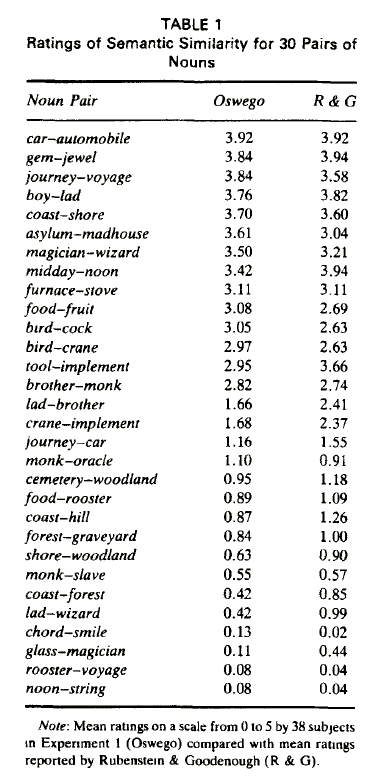